# Get data

*Выгрузка данных. На вход поступает файл, содержащий информацию о препарате "Витам"*

In [ ]:
!gdown 1mt35HH4vFe8wl0E3FyUqLqKljCJgdxCP

Downloading...
From: https://drive.google.com/uc?id=1mt35HH4vFe8wl0E3FyUqLqKljCJgdxCP
To: /content/drug13.csv
100% 662/662 [00:00<00:00, 3.31MB/s]


In [ ]:
import pandas as pd

In [ ]:
drug13 = pd.read_csv('drug13.csv')
drug13

,date,number,price
0,2022-01-10,10.0,122.4
1,2022-01-24,5.0,122.4
2,2022-02-07,3.0,122.4
3,2022-02-14,10.0,122.4
4,2022-02-28,10.0,122.4
5,2022-03-21,15.0,122.4
6,2022-04-11,10.0,122.4
7,2022-05-16,4.0,122.4
8,2022-05-30,10.0,122.4
9,2022-06-22,10.0,122.4


In [ ]:
from datetime import datetime

# Преобразуем столбец "date" в объект datetime
drug13['date'] = pd.to_datetime(drug13['date'])

In [ ]:
# Преобразуем дату в Unix время и добавляем новый столбец "unix_time"
drug13['unix_time'] = drug13['date'].apply(lambda x: int(x.timestamp()))
print(drug13)

         date  number  price   unix_time
0  2022-01-10    10.0  122.4  1641772800
1  2022-01-24     5.0  122.4  1642982400
2  2022-02-07     3.0  122.4  1644192000
3  2022-02-14    10.0  122.4  1644796800
4  2022-02-28    10.0  122.4  1646006400
5  2022-03-21    15.0  122.4  1647820800
6  2022-04-11    10.0  122.4  1649635200
7  2022-05-16     4.0  122.4  1652659200
8  2022-05-30    10.0  122.4  1653868800
9  2022-06-22    10.0  122.4  1655856000
10 2022-07-18    10.0  138.0  1658102400
11 2022-07-25    10.0  138.0  1658707200
12 2022-08-22     4.0  138.0  1661126400
13 2022-09-01    10.0  138.0  1661990400
14 2022-09-29    10.0  138.0  1664409600
15 2022-10-12    10.0  138.0  1665532800
16 2022-10-24    10.0  138.0  1666569600
17 2022-10-31    10.0  138.0  1667174400
18 2022-11-28    10.0  138.0  1669593600
19 2022-12-05    10.0  138.0  1670198400
20 2022-12-27    10.0  144.0  1672099200
21 2023-01-18    10.0  144.0  1674000000
22 2023-02-06    10.0  144.0  1675641600
23 2023-02-13   

*Конвертировать формат даты*

In [ ]:

#Сортировка данных
#drug13 = drug13.sort_values('date')

Разделение на тренировочную и тестовую выборку

In [ ]:
X=drug13['date'].values
y=drug13['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x1= X_train.reshape(-1, 1)
y1 = y_train.reshape(-1, 1)
x2 = X_test.reshape(-1, 1)
y2 = y_test.reshape(-1, 1)

#Интерполяция Лагранжа

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xl = np.array(drug13['unix_time'])
yl = np.array(drug13['number'])

In [ ]:
m = len(xl)
n = m - 1
xp = float(input("Enter x"))
yp = 0


Enter x1677628800


In [ ]:
for i in range(n+1):
  p = 1
  for j in range(n+1):
    if j != i:
      p *= (xp-xl[j])/(xl[i] - xl[j])
      yp += yl[i]*p
print('for x = %.2f, y = %f' % (xp,yp))

for x = 1677628800.00, y = 462338662.473957


In [ ]:
pforxplt = np.linspace(xl[0], xl[-1])
yplt = np.array([], float)


In [ ]:
for xp in xplt:
  yp = 0

  for xi, yi in zip(xl,yl):
    yp += yi * np.prod((xp - xl[xl != xi])/(xi - xl[xl != xi]))
  yplt = np.append(yplt,yp)

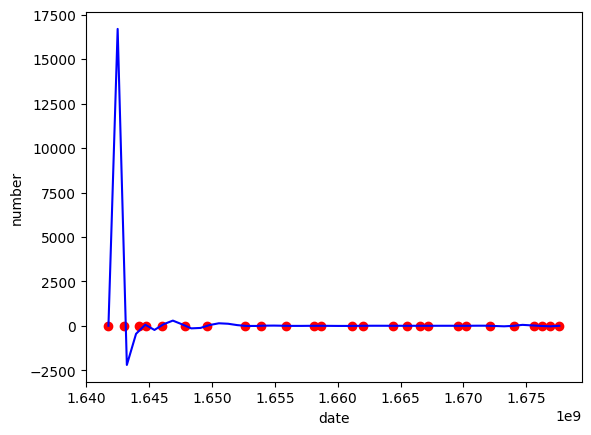

In [ ]:
plt.plot(xl,yl, 'ro', xplt, yplt, 'b-')

plt.xlabel('date')
plt.ylabel('number')

plt.show()

In [ ]:
  import scipy
from numpy.polynomial.polynomial import Polynomial

# Estamte the Lagrange Interpolation for x squared based on three values
lagrange_interpolation = scipy.interpolate.lagrange(drug13['unix_time'], drug13['price'])
lagrange_interpolation



poly1d([-7.89802183e-174,  3.27901392e-163, -6.53444246e-153,
        8.31951985e-143, -7.59876837e-133,  5.29997549e-123,
       -2.93381742e-113,  1.32241641e-103, -4.94116600e-094,
        1.54993563e-084, -4.11822967e-075,  9.32577997e-066,
       -1.80678756e-056,  3.00041508e-047, -4.27078695e-038,
        5.20093949e-029, -5.39800640e-020,  4.74567147e-011,
       -3.50255487e-002,  2.14288218e+007, -1.06754837e+016,
        4.22090323e+024, -1.27440932e+033,  2.76037255e+041,
       -3.81989043e+049,  2.53731541e+057])

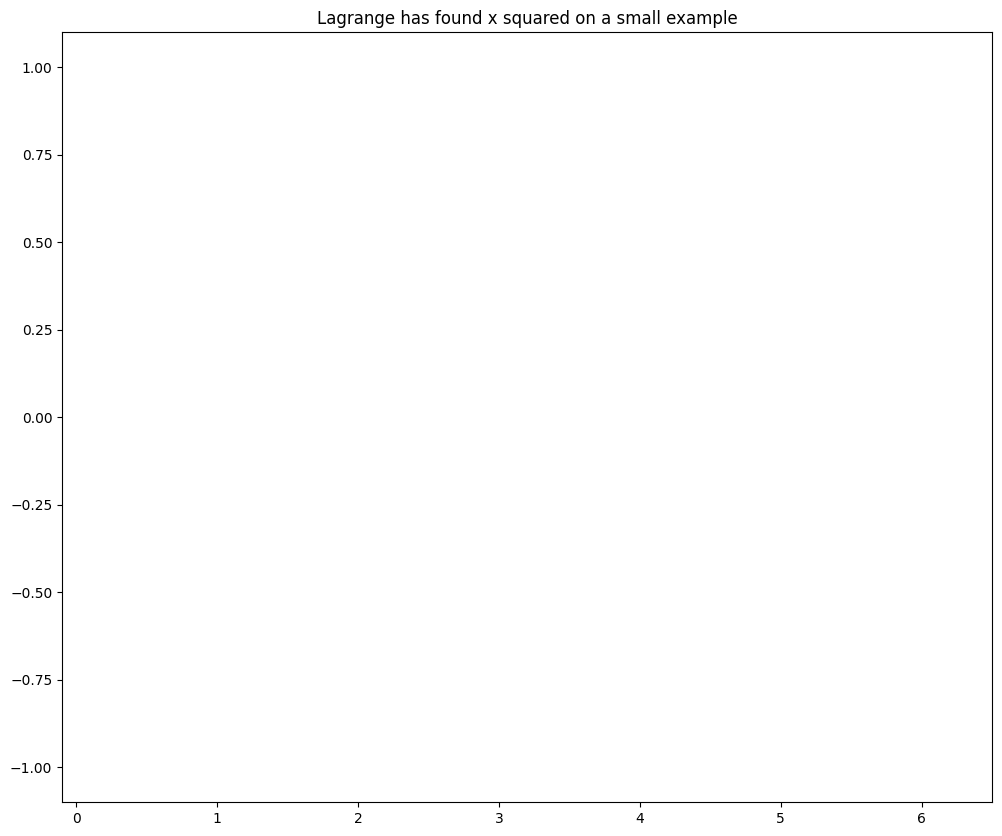

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(drug13['price'], lagrange_interpolation(drug13['price']))
plt.axis([-0.1, 6.5, -1.1, 1.1])

plt.title( 'Lagrange has found x squared on a small example')
plt.show()


#сплайн 2

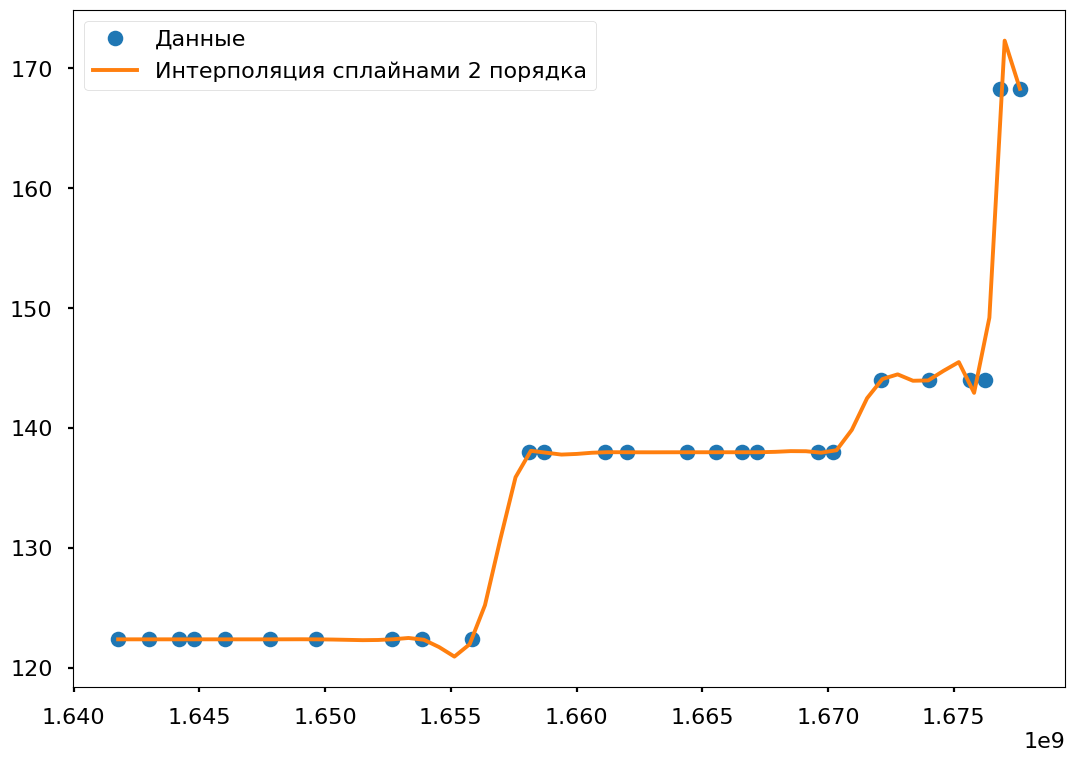

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
# Задаем точки для интерполяции
fx = drug13['unix_time']
fy = drug13['price']

# Создаем объект функции для интерполяции сплайнами 2 порядка
f2 = interp1d(fx, fy, kind='quadratic')

# Выполняем интерполяцию сплайнами 2 порядка для точки x=3
# Создаем массив точек для построения графика
l = len(fx)-1
xnew2 = np.linspace(fx[0], fx[l], num=60, endpoint=True)
ynew2 = f2(xnew2)

# Строим график интерполяции сплайнами 2 порядка
plt.plot(fx, fy, 'o', xnew2, ynew2, '-')
plt.legend(['Данные', 'Интерполяция сплайнами 2 порядка'], loc='best')
plt.show()


#сплайн 3

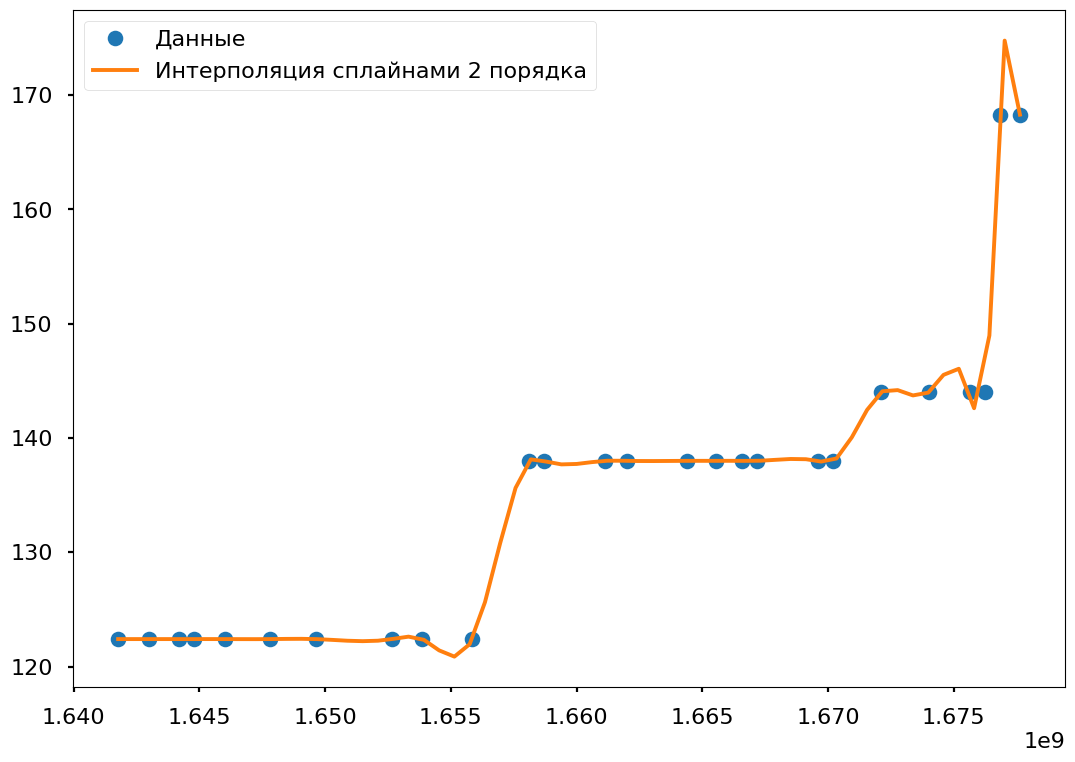

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Задаем точки для интерполяции
fx = drug13['unix_time']
fy = drug13['price']

# Создаем объект функции для интерполяции сплайнами 2 порядка
f3 = interp1d(fx, fy, kind='cubic')

# Выполняем интерполяцию сплайнами 2 порядка для точки x=3
# Создаем массив точек для построения графика
l = len(fx)-1
xnew3 = np.linspace(fx[0], fx[l], num=60, endpoint=True)
ynew3 = f3(xnew3)

# Строим график интерполяции сплайнами 2 порядка
plt.plot(fx, fy, 'o', xnew3, ynew3, '-')
plt.legend(['Данные', 'Интерполяция сплайнами 2 порядка'], loc='best')
plt.show()


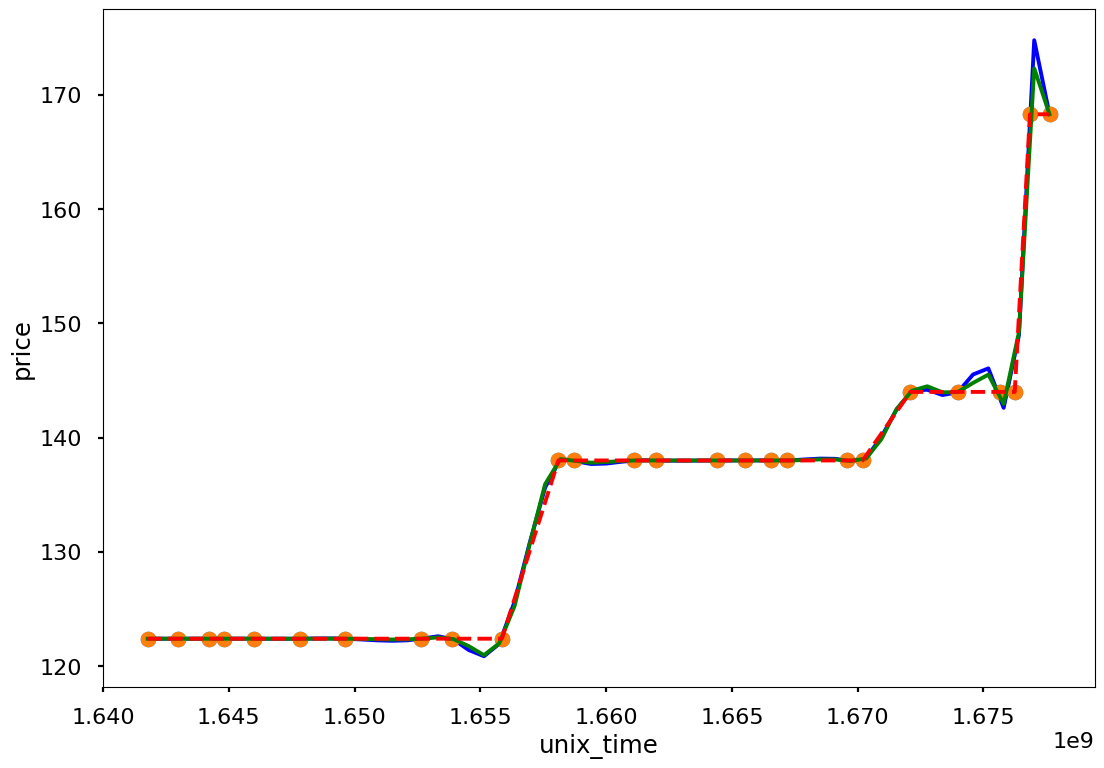

In [ ]:
plt.plot(fx, fy, 'o', xnew3, ynew3, 'b-')
plt.plot(fx, fy, 'o', xnew2, ynew2, 'green')
sns.lineplot(x=drug13['unix_time'], y=drug13['price'], linestyle='dashed', color='red')
plt.show()

#Интерполяция сплайнами 2 порядка

In [ ]:
 df = pd.DataFrame({"unix_time": xnew2, "price": ynew2 })
 df

,unix_time,price
0,1.641773e+09,122.400000
1,1.642381e+09,122.399999
2,1.642988e+09,122.400000
3,1.643596e+09,122.400002
4,1.644204e+09,122.400000
5,1.644811e+09,122.400001
6,1.645419e+09,122.400071
7,1.646027e+09,122.399992
8,1.646635e+09,122.399558
9,1.647242e+09,122.399074


In [ ]:
from datetime import datetime

df['date'] = pd.to_datetime(df['unix_time'],unit='s') # Changing the values of the column

# Удаляем время из столбца 'datetime'
df['date'] = df['date'].dt.date

# Выводим результат
print(df)



       unix_time       price        date
0   1.641773e+09  122.400000  2022-01-10
1   1.642381e+09  122.399999  2022-01-17
2   1.642988e+09  122.400000  2022-01-24
3   1.643596e+09  122.400002  2022-01-31
4   1.644204e+09  122.400000  2022-02-07
5   1.644811e+09  122.400001  2022-02-14
6   1.645419e+09  122.400071  2022-02-21
7   1.646027e+09  122.399992  2022-02-28
8   1.646635e+09  122.399558  2022-03-07
9   1.647242e+09  122.399074  2022-03-14
10  1.647850e+09  122.400088  2022-03-21
11  1.648458e+09  122.402819  2022-03-28
12  1.649066e+09  122.405467  2022-04-04
13  1.649673e+09  122.399323  2022-04-11
14  1.650281e+09  122.383234  2022-04-18
15  1.650889e+09  122.357199  2022-04-25
16  1.651496e+09  122.330575  2022-05-02
17  1.652104e+09  122.345534  2022-05-09
18  1.652712e+09  122.407199  2022-05-16
19  1.653320e+09  122.513424  2022-05-23
20  1.653927e+09  122.365465  2022-05-30
21  1.654535e+09  121.751952  2022-06-06
22  1.655143e+09  120.958632  2022-06-13
23  1.655751e+09

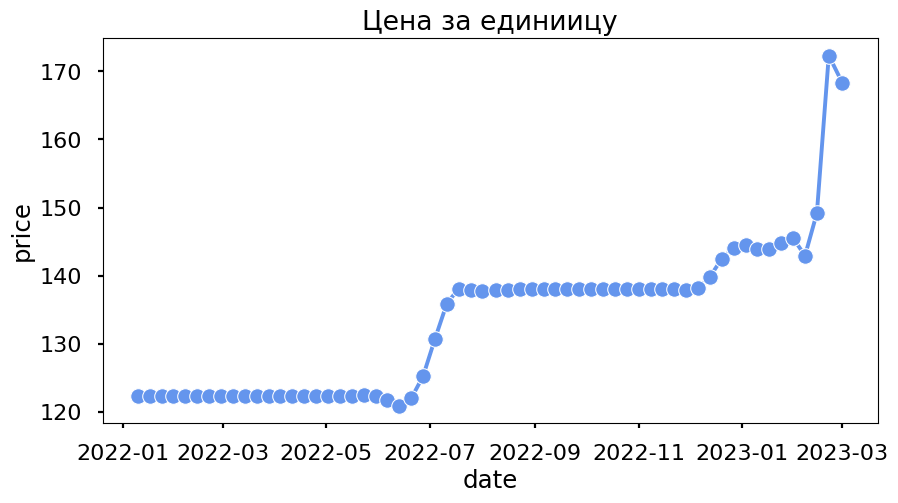

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df['date'], y=df['price'], color='cornflowerblue', marker='o')
plt.title("Цена за единиицу")
plt.show()

#сплайн 2 количество

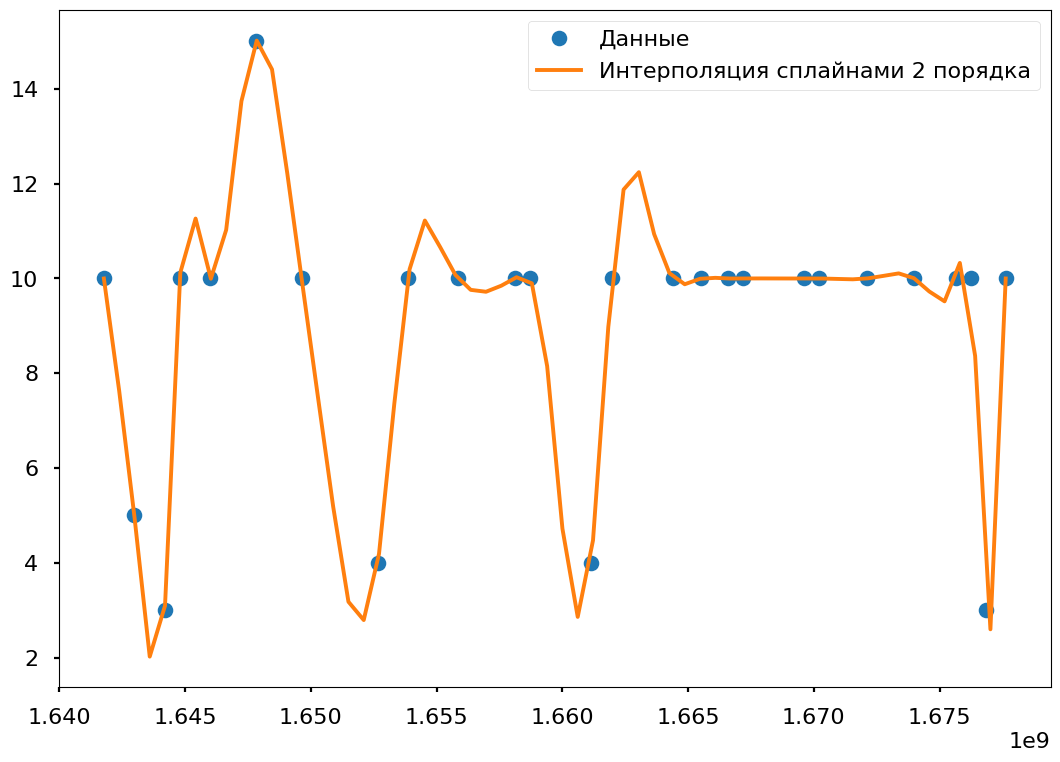

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
# Задаем точки для интерполяции
jx = drug13['unix_time']
jy = drug13['number']

# Создаем объект функции для интерполяции сплайнами 2 порядка
j2 = interp1d(jx, jy, kind='quadratic')

# Выполняем интерполяцию сплайнами 2 порядка для точки x=3
# Создаем массив точек для построения графика
lj = len(jx)-1
jxnew2 = np.linspace(jx[0], jx[lj], num=60, endpoint=True)
jynew2 = j2(jxnew2)

# Строим график интерполяции сплайнами 2 порядка
plt.plot(jx, jy, 'o', jxnew2, jynew2, '-')
plt.legend(['Данные', 'Интерполяция сплайнами 2 порядка'], loc='best')
plt.show()

In [ ]:
dfn = pd.DataFrame({"unix_time": jxnew2, "number": jynew2 })
from datetime import datetime

dfn['date'] = pd.to_datetime(dfn['unix_time'],unit='s') # Changing the values of the column

# Удаляем время из столбца 'datetime'
dfn['date'] = dfn['date'].dt.date

# Выводим результат
print(dfn)

       unix_time     number        date
0   1.641773e+09  10.000000  2022-01-10
1   1.642381e+09   7.632314  2022-01-17
2   1.642988e+09   4.972976  2022-01-24
3   1.643596e+09   2.022862  2022-01-31
4   1.644204e+09   3.097277  2022-02-07
5   1.644811e+09  10.122351  2022-02-14
6   1.645419e+09  11.264555  2022-02-21
7   1.646027e+09   9.994644  2022-02-28
8   1.646635e+09  11.024612  2022-03-07
9   1.647242e+09  13.742464  2022-03-14
10  1.647850e+09  15.018307  2022-03-21
11  1.648458e+09  14.411479  2022-03-28
12  1.649066e+09  12.215608  2022-04-04
13  1.649673e+09   9.852570  2022-04-11
14  1.650281e+09   7.510491  2022-04-18
15  1.650889e+09   5.189371  2022-04-25
16  1.651496e+09   3.180179  2022-05-02
17  1.652104e+09   2.794549  2022-05-09
18  1.652712e+09   4.191833  2022-05-16
19  1.653320e+09   7.356970  2022-05-23
20  1.653927e+09  10.194700  2022-05-30
21  1.654535e+09  11.222538  2022-06-06
22  1.655143e+09  10.662367  2022-06-13
23  1.655751e+09  10.074143  2022-06-20


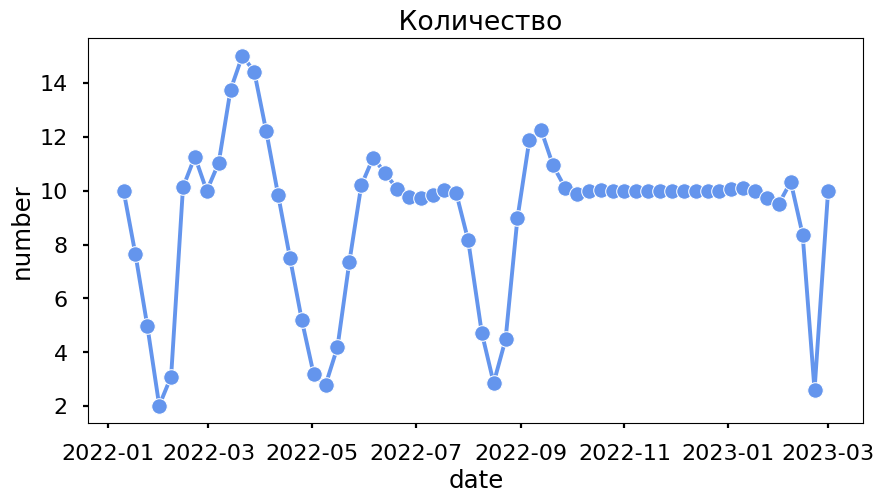

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=dfn['date'], y=dfn['number'], color='cornflowerblue', marker='o')
plt.title(" Количество")
plt.show()

# **Прогноз цены**

## Inspect initial data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

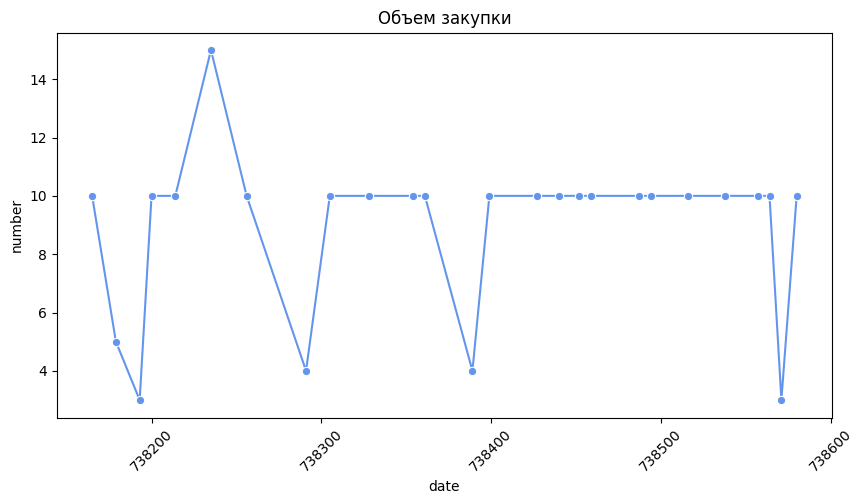

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=drug13['date'], y=drug13['number'], color='cornflowerblue', marker='o')
plt.xticks(rotation=45)
plt.title("Объем закупки")
plt.show()

перевод во время в сек, в комп время

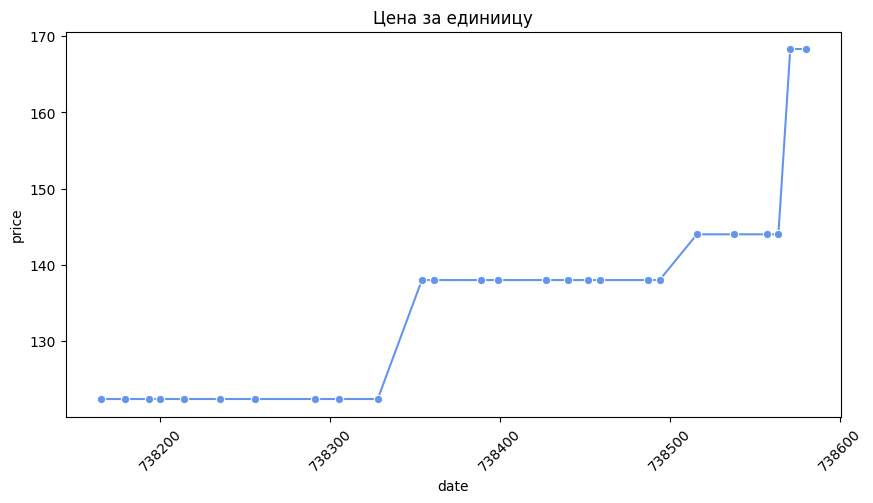

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=drug13['date'], y=drug13['price'], color='cornflowerblue', marker='o')
plt.xticks(rotation=45)
plt.title("Цена за единиицу")
plt.show()

## Sliding windows

AC = 99.9

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols = list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
 # put it all together
 agg = pd.concat(cols, axis=1)
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg.values

In [ ]:
dr13 = drug13[['date','price']]
dr13

,date,price
0,2022-01-10,122.4
1,2022-01-24,122.4
2,2022-02-07,122.4
3,2022-02-14,122.4
4,2022-02-28,122.4
5,2022-03-21,122.4
6,2022-04-11,122.4
7,2022-05-16,122.4
8,2022-05-30,122.4
9,2022-06-22,122.4


In [ ]:
window_2 = series_to_supervised(dr13, dropnan=True, n_in=2)
window_2

array([['2022-01-10', 122.4, '2022-01-24', 122.4, '2022-02-07', 122.4],
       ['2022-01-24', 122.4, '2022-02-07', 122.4, '2022-02-14', 122.4],
       ['2022-02-07', 122.4, '2022-02-14', 122.4, '2022-02-28', 122.4],
       ['2022-02-14', 122.4, '2022-02-28', 122.4, '2022-03-21', 122.4],
       ['2022-02-28', 122.4, '2022-03-21', 122.4, '2022-04-11', 122.4],
       ['2022-03-21', 122.4, '2022-04-11', 122.4, '2022-05-16', 122.4],
       ['2022-04-11', 122.4, '2022-05-16', 122.4, '2022-05-30', 122.4],
       ['2022-05-16', 122.4, '2022-05-30', 122.4, '2022-06-22', 122.4],
       ['2022-05-30', 122.4, '2022-06-22', 122.4, '2022-07-18', 138.0],
       ['2022-06-22', 122.4, '2022-07-18', 138.0, '2022-07-25', 138.0],
       ['2022-07-18', 138.0, '2022-07-25', 138.0, '2022-08-22', 138.0],
       ['2022-07-25', 138.0, '2022-08-22', 138.0, '2022-09-01', 138.0],
       ['2022-08-22', 138.0, '2022-09-01', 138.0, '2022-09-29', 138.0],
       ['2022-09-01', 138.0, '2022-09-29', 138.0, '2022-10-12', 

In [ ]:
window_2.shape

(24, 6)

In [ ]:
[print(f"'date{i}','price{i}'",sep=' ') for i in range(1,4)]

'date1','price1'
'date2','price2'
'date3','price3'


[None, None, None]

In [ ]:
cols2 = ['date1','price1','date2','price2','date3','price3']

In [ ]:
dr13_w2 = pd.DataFrame(window_2, columns = cols2)
dr13_w2

,date1,price1,date2,price2,date3,price3
0,2022-01-10,122.4,2022-01-24,122.4,2022-02-07,122.4
1,2022-01-24,122.4,2022-02-07,122.4,2022-02-14,122.4
2,2022-02-07,122.4,2022-02-14,122.4,2022-02-28,122.4
3,2022-02-14,122.4,2022-02-28,122.4,2022-03-21,122.4
4,2022-02-28,122.4,2022-03-21,122.4,2022-04-11,122.4
5,2022-03-21,122.4,2022-04-11,122.4,2022-05-16,122.4
6,2022-04-11,122.4,2022-05-16,122.4,2022-05-30,122.4
7,2022-05-16,122.4,2022-05-30,122.4,2022-06-22,122.4
8,2022-05-30,122.4,2022-06-22,122.4,2022-07-18,138.0
9,2022-06-22,122.4,2022-07-18,138.0,2022-07-25,138.0


In [ ]:
X = dr13_w2[['price1','price2','price3']]
X

,price1,price2,price3
0,122.4,122.4,122.4
1,122.4,122.4,122.4
2,122.4,122.4,122.4
3,122.4,122.4,122.4
4,122.4,122.4,122.4
5,122.4,122.4,122.4
6,122.4,122.4,122.4
7,122.4,122.4,122.4
8,122.4,122.4,138.0
9,122.4,138.0,138.0


In [ ]:
X = X.astype({'price1':'float',
          'price2':'float',
          'price3':'float'})

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the test data
X_train, X_test, y_train, y_test = train_test_split(X[['price1','price2']], X['price3'], test_size=0.2, shuffle=True, random_state=42)

In [ ]:
X_test

,price1,price2
8,122.4,122.4
16,138.0,138.0
0,122.4,122.4
18,138.0,138.0
11,138.0,138.0


In [ ]:
X_test.dtypes

price1    float64
price2    float64
dtype: object

In [ ]:
y_train

9     138.0
13    138.0
1     122.4
21    144.0
5     122.4
2     122.4
12    138.0
15    138.0
3     122.4
4     122.4
22    168.3
17    138.0
20    144.0
23    168.3
7     122.4
10    138.0
14    138.0
19    144.0
6     122.4
Name: price3, dtype: float64

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
xgbr = xgb.XGBRegressor()
xgbr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgbr.fit(x1, y1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
score = xgbr.score(x1, y1)

print("Training score: ", score)

Training score:  0.9999999995582913


In [ ]:
scores = cross_val_score(xgbr, x1, y1, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.54


In [ ]:
ypred = xgbr.predict(x2)
ypred

array([122.40022, 143.9998 , 138.00002, 138.00002, 122.40022, 138.00002],
      dtype=float32)

In [ ]:
y2

array([[122.4],
       [144. ],
       [138. ],
       [138. ],
       [122.4],
       [138. ]])

In [ ]:
ypred = xgbr.predict(x2)
mse = mean_squared_error(y2, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.00
RMSE: 0.00


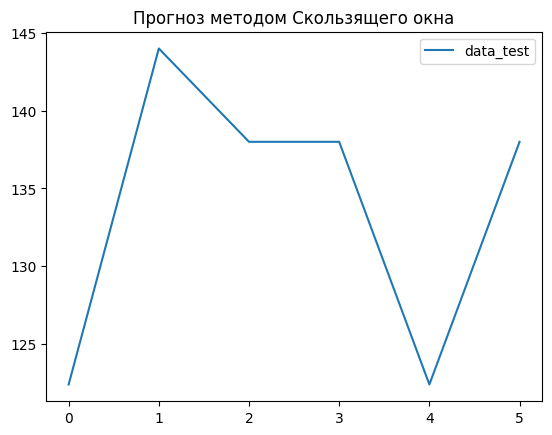

In [ ]:
x_ax = range(len(y2))
plt.plot( x_ax,y2, label="тестовые данные")
plt.title("Прогноз методом Скользящего окна")

plt.legend()
plt.show()

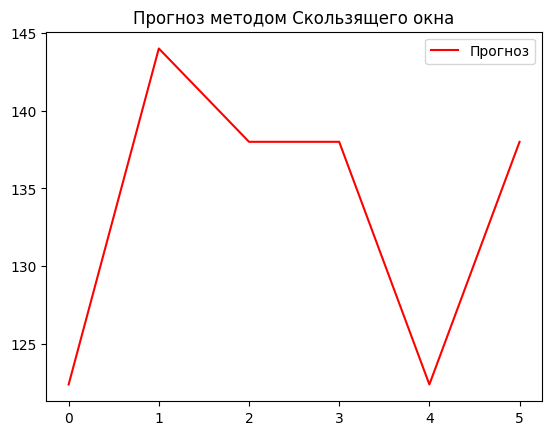

In [ ]:
x_ax = range(len(y2))
plt.plot( x_ax, ypred, color = 'red', label="Прогноз")
plt.title("Прогноз методом Скользящего окна")

plt.legend()
plt.show()


In [ ]:
y_test

array([122.4, 144. , 138. , 138. , 122.4, 138. ])

In [ ]:
ypred

array([122.40022, 143.9998 , 138.00002, 138.00002, 122.40022, 138.00002],
      dtype=float32)

In [ ]:
#y_pred_train = xgbr.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y2,ypred)

0.9999999996658337

##AR нет

AC = 95.06

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:

#Проверка стационарности данных

from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(drug13['price'], autolag='AIC')

print("P-value: ", df_stationarityTest[1])


P-value:  0.9761805757293655


In [ ]:
if df_stationarityTest[1] > 0.05:
  print ("Данные НЕ стационарны")
else:
  print ("Данные стационарны")

Данные НЕ стационарны


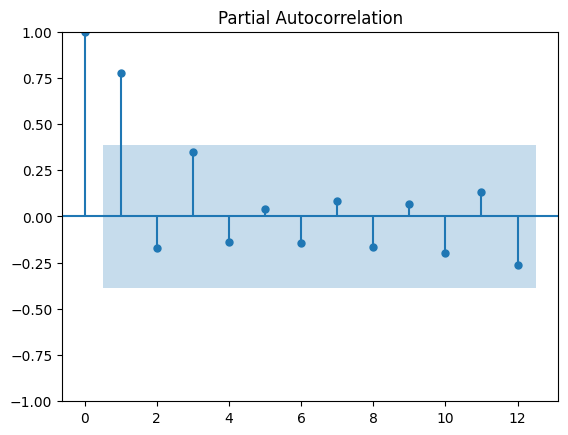

In [ ]:
#Определение порядка обучения AR-модели

# график частичной автокорреляции для оценки влияния прошлых данных на будущие
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(drug13['price'], lags=12)

In [ ]:
ar_model = AutoReg(train_data, lags =9).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  price   No. Observations:                   20
Model:                     AutoReg(9)   Log Likelihood                 -28.828
Method:               Conditional MLE   S.D. of innovations              3.326
Date:                Tue, 13 Jun 2023   AIC                             79.655
Time:                        18:27:52   BIC                             84.032
Sample:                             9   HQIC                            76.896
                                   20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.0000     33.374      2.067      0.039       3.589     134.411
price.L1       0.5000      0.261      1.915      0.056      -0.012       1.012
price.L2   -7.007e-15      0.302  -2.32e-14      1.0

In [ ]:
#Построение прогноза
AR_pred = ar_model.predict(start=len(train_data), end=(len(drug13)-1), dynamic=False)
print("Прогноз:", AR_pred, sep = "\n" )

Прогноз:
20    138.0
21    138.0
22    138.0
23    138.0
24    138.0
25    138.0
dtype: float64


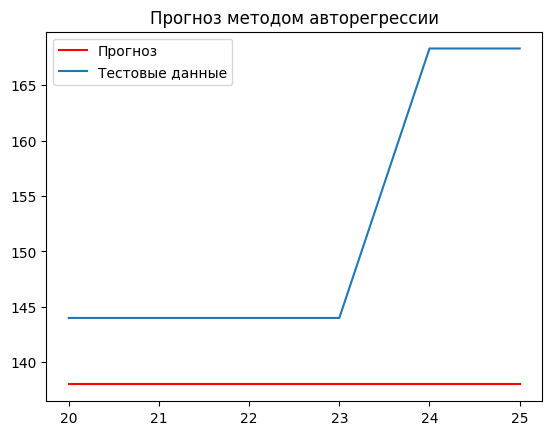

Тест:
20    144.0
21    144.0
22    144.0
23    144.0
24    168.3
25    168.3
Name: price, dtype: float64


In [ ]:
#Построение графиков
from matplotlib import pyplot
pyplot.plot(AR_pred,color='red', label="Прогноз")
pyplot.plot(test_data, label="Тестовые данные")
plt.title("Прогноз методом авторегрессии")

plt.legend()
plt.show()
print("Тест:",test_data, sep = "\n")





In [ ]:
#Оценка точности прогноза
print('Accuracy',100- (np.mean(np.abs(( y_test - AR_pred) / y_test)) * 100))


Accuracy 95.05718954248326


## MA

## KNN

AC = 91.85

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_RegModel = KNeighborsRegressor(n_neighbors=6)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_RegModel = KNeighborsRegressor(n_neighbors=2)

#Printing all the parameters of KNN
print(KNN_RegModel)
x1= X_train.reshape(-1, 1)
y1 = y_train.reshape(-1, 1)
x2 = X_test.reshape(-1, 1)
y2 = y_test.reshape(-1, 1)


KNeighborsRegressor(n_neighbors=2)


In [ ]:
#Creating the model on Training Data
KNN=KNN_RegModel.fit(x1,y1)
knn_pred=KNN.predict(y2)

In [ ]:

knn_pred

array([[122.4],
       [122.4],
       [122.4],
       [122.4],
       [122.4],
       [122.4]])

In [ ]:
import numpy as np
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y2, knn_pred))

#Оценка точности
print('Accuracy',100- (np.mean(np.abs(( y2 - knn_pred) / y2)) * 100))



R2 Value: -1.8704663212435229
Accuracy 91.84782608695653


In [ ]:
from matplotlib import pyplot

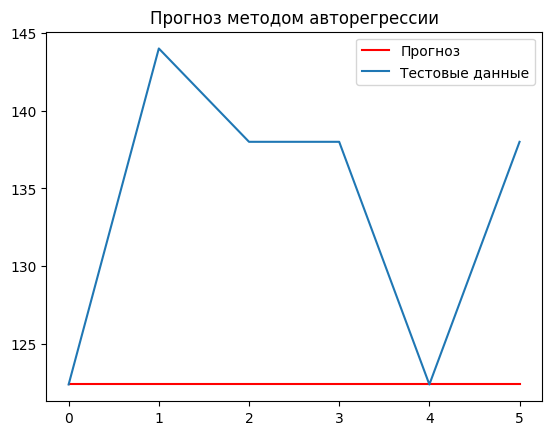

Прогноз:
[[122.4]
 [122.4]
 [122.4]
 [122.4]
 [122.4]
 [122.4]]
Тест:
[[122.4]
 [144. ]
 [138. ]
 [138. ]
 [122.4]
 [138. ]]


In [ ]:
pyplot.plot(knn_pred,color='red', label="Прогноз")
pyplot.plot(y2, label="Тестовые данные")
plt.title("Прогноз методом авторегрессии")

plt.legend()
plt.show()
print("Прогноз:", knn_pred, sep ="\n")
print("Тест:", y2, sep ="\n")

##Linear Reg

AC = 98.77

MAE = 1.63
MSE = 5.24
RMSE = 2.29

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x1, y1)
model = LinearRegression().fit(x2, y2)

In [ ]:
r_sq = model.score(x2, y2)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9246249110103216
intercept: [-50495.66763451]
slope: [[0.06856969]]


In [ ]:
y_pred = model.intercept_ + model.coef_ * x2
print('predicted response:', y_pred, sep='\n')

predicted response:
[[121.99458573]
 [144.14259431]
 [138.03989225]
 [140.2341222 ]
 [124.87451254]
 [133.51429297]]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred)))




Mean Absolute Error: 1.630373766226209
Mean Squared Error: 5.237061183002848
Root Mean Squared Error: 2.2884626243403776


In [ ]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs(( y2 - y_pred) / y2)) * 100))

Accuracy 98.77495764932061


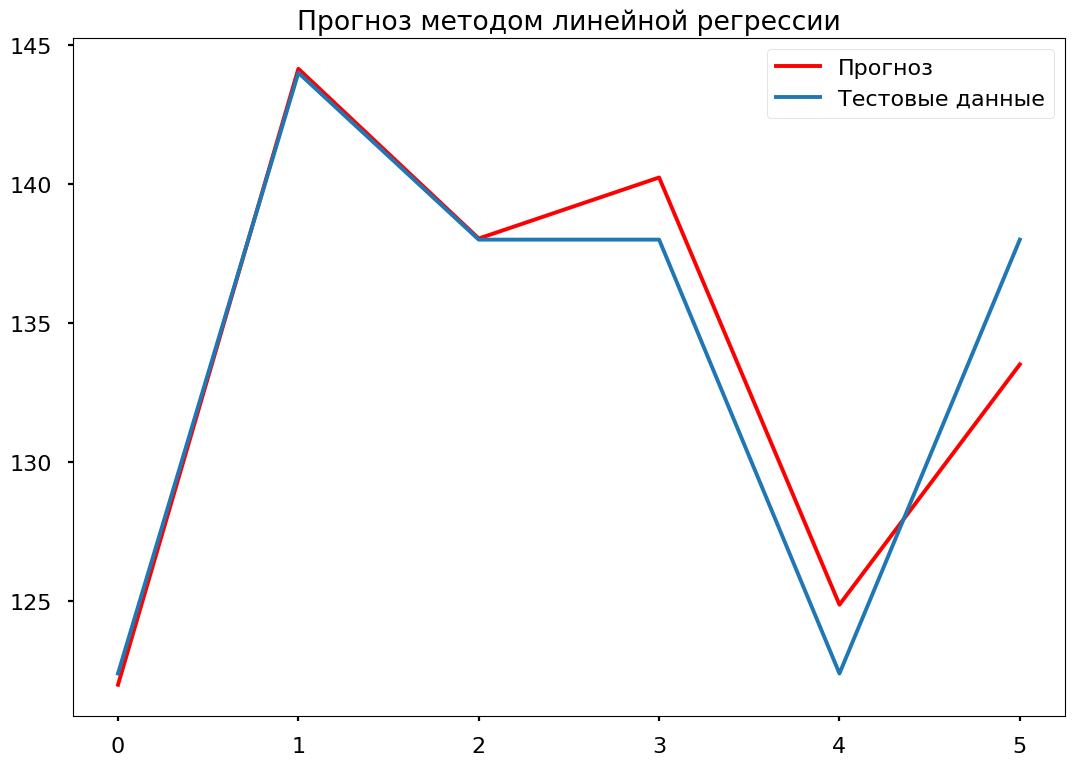

In [ ]:
from matplotlib import pyplot
pyplot.plot(y_pred, color='red', label="Прогноз")
pyplot.plot(y2, label="Тестовые данные")

plt.title("Прогноз методом линейной регрессии")

plt.legend()
plt.show()



## SVM Reg


###radial basis function


R2 = -2.95
RMSE = 94.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR



In [ ]:
#Создание модели
svr = SVR(kernel='rbf')
#Обучение модели
svr.fit(x1, y1)
#Прогноз
rbf_preds = svr.predict(y2)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rbf_preds

array([133.84528899, 133.84528899, 133.84528899, 133.84528899,
       133.84528899, 133.84528899])

In [ ]:
#Оценка точности

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y2, rbf_preds))

print('Accuracy',100- (np.mean(np.abs((y2 - rbf_preds) / y2)) * 100))

R2 Value: -2.9520612813360714e-05
Accuracy 94.2024473822752


Прогноз:
[133.84528899 133.84528899 133.84528899 133.84528899 133.84528899
 133.84528899]
Тест:
[[122.4]
 [144. ]
 [138. ]
 [138. ]
 [122.4]
 [138. ]]


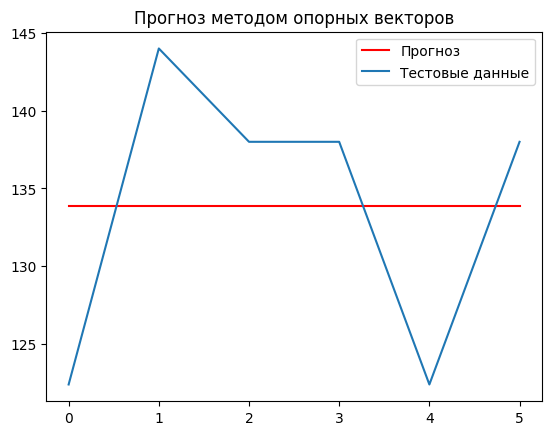

In [ ]:
from matplotlib import pyplot
pyplot.plot(rbf_preds, color='red', label="Прогноз")
pyplot.plot(y2, label="Тестовые данные")
print ("Прогноз:", rbf_preds, sep = '\n')
print("Тест:", y2, sep = '\n')
plt.title("Прогноз методом опорных векторов")
plt.legend()
plt.show()

##*Least Squares*

AC= 86.23

R2 = -0.17
RMSE = 27.9

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

<ipython-input-221-f74e46e2dd34>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [ ]:
mean_x = np.mean(X)
mean_y = np.mean(y)
n = len(X)

In [ ]:
# Рассчет m и c
numer = 0
denom = 0
for i in range(n):
  numer += (X[i] - mean_x) * (y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
  m = numer / denom
  c = mean_y - (m * mean_x)

print("Coefficients")
print(m, c)

Coefficients
0.08296118863547863 -61121.86473881698


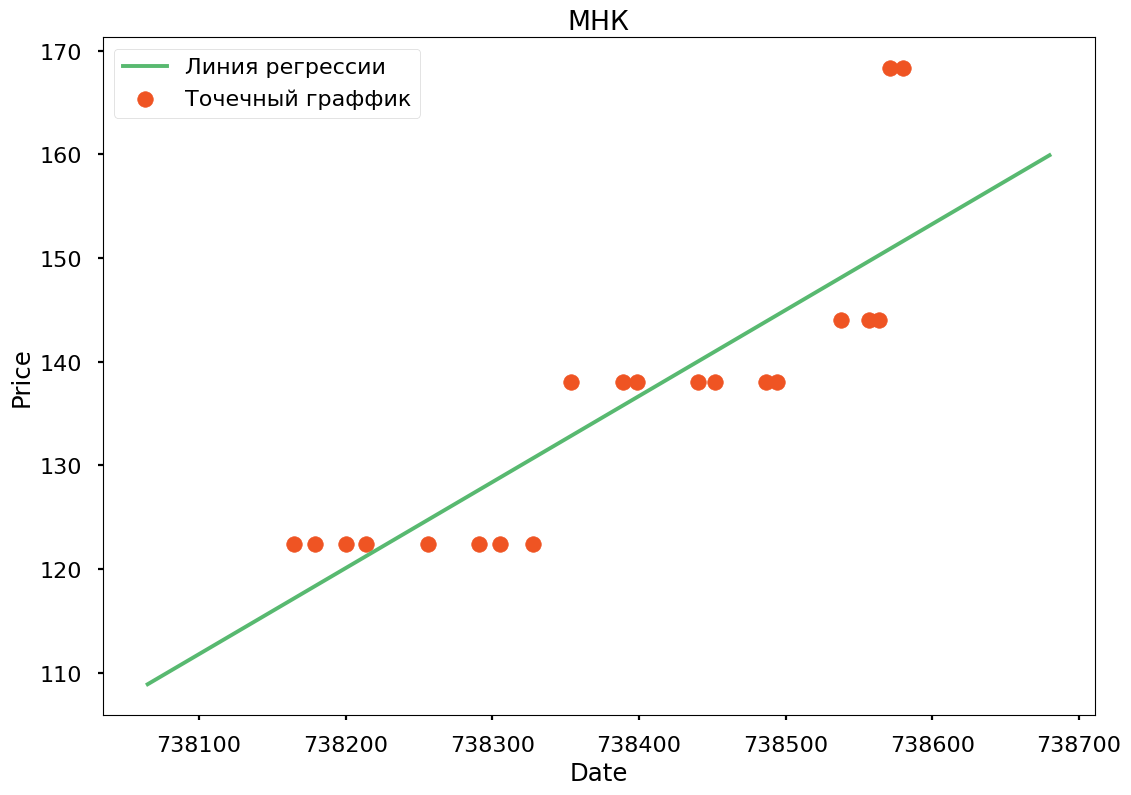

In [ ]:
#График
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Рассчет значений х и у
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Линия регрессии')

plt.scatter(X1, y1, c='#ef5423', label='Точечный граффик')

plt.title("МНК")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred_ls = c + m * X[i]
    rmse += (y[i] - y_pred_ls) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
27.859097350253585


In [ ]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (y[i] - mean_y) ** 2
    ss_res += (y[i] - y_pred_ls) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
-1.6750471011152395


In [ ]:
#Оценка точности
print('Accuracy',100- (np.mean(np.abs(( y2 - y_pred_ls) / y2)) * 100))

Accuracy 86.23328784745902


##Decision tree

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

In [ ]:
X=drug13['date'].values
y=drug13['price'].values
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X1= X_train.reshape(-1, 1)
y1 = y_train.reshape(-1, 1)
X2 = X_test.reshape(-1, 1)
y2 = y_test.reshape(-1, 1)

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X1, y1)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_tree = dt_regressor.predict(X2)
acc = r2_score(y2, y_pred_tree)
print ('Accuracy', acc )

Accuracy 0.9136442141623489


In [ ]:
y_pred_tree

array([122.4, 138. , 138. , 138. , 122.4, 138. ])

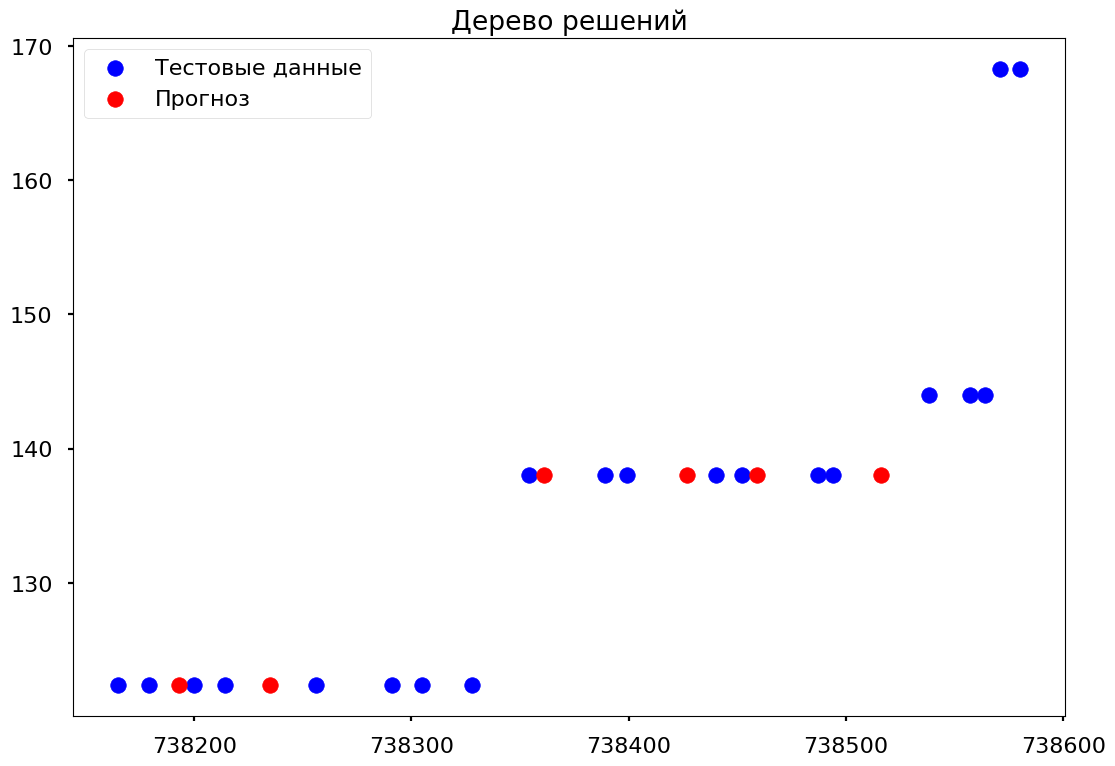

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X1,y1, color = "blue", label = 'Тестовые данные')
ax.scatter(X2,y_pred_tree, color = "red",  label = 'Прогноз')
plt.title("Дерево решений")

plt.legend()
plt.show()


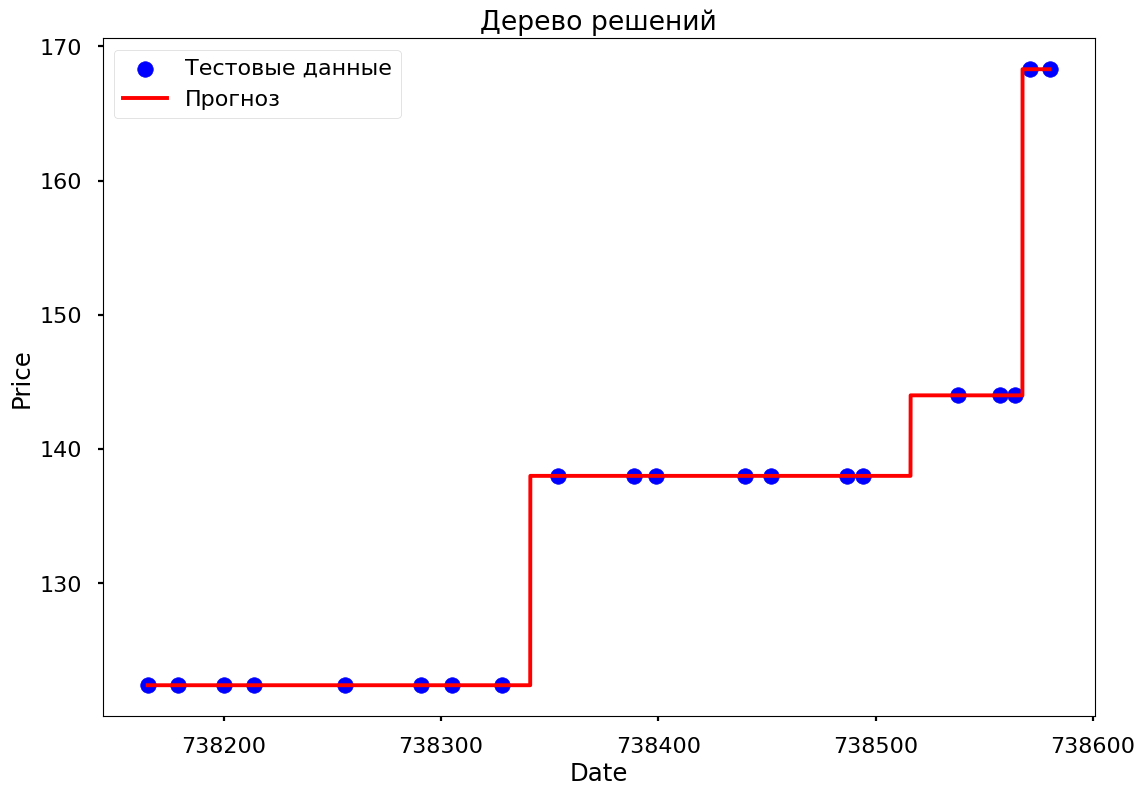

In [ ]:

X_grid = np.arange(min(X), max(X), 0.01)

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X1, y1, color = 'blue', label = 'Тестовые данные')

plt.plot(X_grid, dt_regressor.predict(X_grid), color = 'red',label = 'Прогноз')

plt.title('Дерево решений')

plt.xlabel('Date')

plt.ylabel('Price')
plt.legend()
plt.show()



#**Проверка прогноза объема**

##DEC3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

In [ ]:
X=drug13['date'].values
z=drug13['number'].values
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)
X1= X_train.reshape(-1, 1)
z1 = z_train.reshape(-1, 1)
X2 = X_test.reshape(-1, 1)
z2 = z_test.reshape(-1, 1)

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X1,z1)

DecisionTreeRegressor(random_state=0)

In [ ]:
z_pred_tree = dt_regressor.predict(X2)
acc = r2_score(y2, z_pred_tree)
print ('Accuracy', acc )

Accuracy -220.58779504893508


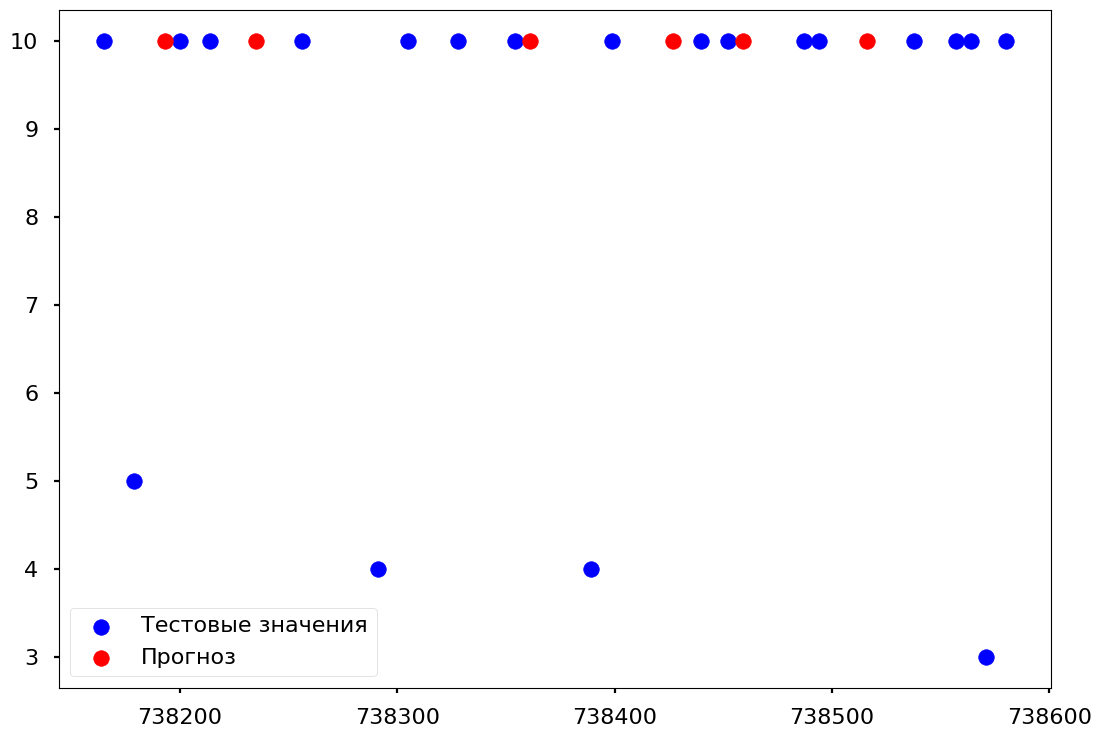

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X1,z1, color = "blue", label = 'Тестовые значения')
ax.scatter(X2,z_pred_tree, color = "red", label = 'Прогноз')
plt.legend()
plt.show()

##KNN

In [ ]:
X=drug13['date'].values
z=drug13['number'].values

from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_RegModel = KNeighborsRegressor(n_neighbors=6)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_RegModel = KNeighborsRegressor(n_neighbors=6)

print(KNN_RegModel)
x1= X_train.reshape(-1, 1)
z1 = z_train.reshape(-1, 1)
x2 = X_test.reshape(-1, 1)
z2 = z_test.reshape(-1, 1)

KNN=KNN_RegModel.fit(x1,z1)
zknn_pred=KNN.predict(z2)

KNeighborsRegressor(n_neighbors=6)


In [ ]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(z1, KNN.predict(x1)))


print('Accuracy',100- (np.mean(np.abs(( z2 - zknn_pred) / z2)) * 100))

R2 Value: -0.07153014789533585
Accuracy 51.48148148148147


In [ ]:
from matplotlib import pyplot

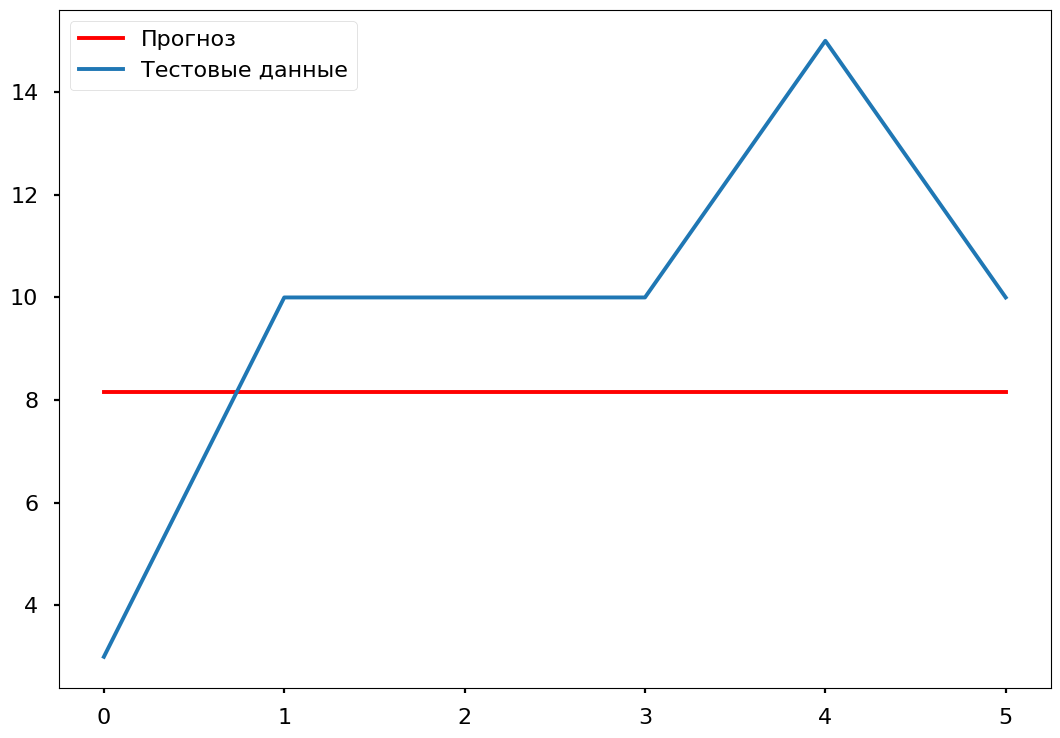

[[8.16666667]
 [8.16666667]
 [8.16666667]
 [8.16666667]
 [8.16666667]
 [8.16666667]]
[[ 3.]
 [10.]
 [10.]
 [10.]
 [15.]
 [10.]]


In [ ]:
pyplot.plot(zknn_pred,color='red', label= 'Прогноз')
pyplot.plot(z2, label= 'Тестовые данные')
plt.legend()
plt.show()
print(zknn_pred)
print(z2)

##LR

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x1, z1)
model = LinearRegression().fit(x2, z2)

In [ ]:
r_sq = model.score(x2, z2)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.05111263072393413
intercept: [-4982.9688972]
slope: [[0.00676174]]


In [ ]:
z_pred = model.intercept_ + model.coef_ * x2
print('predicted response:', z_pred, sep='\n')

predicted response:
[[ 8.5025199 ]
 [10.68656292]
 [10.08476778]
 [10.30114356]
 [ 8.78651311]
 [ 9.63849274]]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(z2, z_pred))
print('Mean Squared Error:', metrics.mean_squared_error(z2, z_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(z2, z_pred)))

Mean Absolute Error: 2.1916647183794944
Mean Squared Error: 11.597512291151917
Root Mean Squared Error: 3.4055120453687895


In [ ]:

print('Accuracy',100- (np.mean(np.abs(( z2 - z_pred) / z2)) * 100))

Accuracy 60.136601486564764


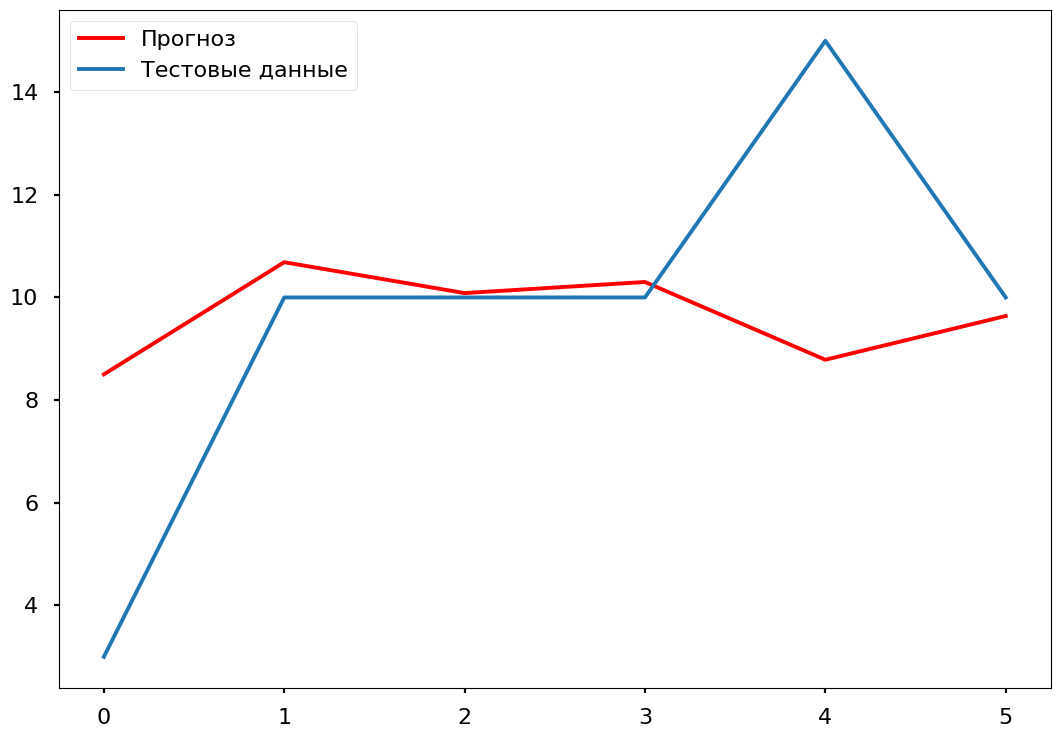

In [ ]:
from matplotlib import pyplot
pyplot.plot(z_pred, color='red', label= 'Прогноз' )
pyplot.plot(z2, label= 'Тестовые данные' )
plt.legend()
plt.show()

##slid wind

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols = list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
 # put it all together
 agg = pd.concat(cols, axis=1)
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg.values

In [ ]:
dr13 = drug13[['date','number']]
dr13

,date,number
0,738165,10.0
1,738179,5.0
2,738193,3.0
3,738200,10.0
4,738214,10.0
5,738235,15.0
6,738256,10.0
7,738291,4.0
8,738305,10.0
9,738328,10.0


In [ ]:
window_2 = series_to_supervised(dr13, dropnan=True, n_in=2)
window_2

array([[7.38165e+05, 1.00000e+01, 7.38179e+05, 5.00000e+00, 7.38193e+05,
        3.00000e+00],
       [7.38179e+05, 5.00000e+00, 7.38193e+05, 3.00000e+00, 7.38200e+05,
        1.00000e+01],
       [7.38193e+05, 3.00000e+00, 7.38200e+05, 1.00000e+01, 7.38214e+05,
        1.00000e+01],
       [7.38200e+05, 1.00000e+01, 7.38214e+05, 1.00000e+01, 7.38235e+05,
        1.50000e+01],
       [7.38214e+05, 1.00000e+01, 7.38235e+05, 1.50000e+01, 7.38256e+05,
        1.00000e+01],
       [7.38235e+05, 1.50000e+01, 7.38256e+05, 1.00000e+01, 7.38291e+05,
        4.00000e+00],
       [7.38256e+05, 1.00000e+01, 7.38291e+05, 4.00000e+00, 7.38305e+05,
        1.00000e+01],
       [7.38291e+05, 4.00000e+00, 7.38305e+05, 1.00000e+01, 7.38328e+05,
        1.00000e+01],
       [7.38305e+05, 1.00000e+01, 7.38328e+05, 1.00000e+01, 7.38354e+05,
        1.00000e+01],
       [7.38328e+05, 1.00000e+01, 7.38354e+05, 1.00000e+01, 7.38361e+05,
        1.00000e+01],
       [7.38354e+05, 1.00000e+01, 7.38361e+05, 1.0

In [ ]:
window_2.shape

(24, 6)

In [ ]:
[print(f"'date{i}','number{i}'",sep=' ') for i in range(1,4)]

'date1','number1'
'date2','number2'
'date3','number3'


[None, None, None]

In [ ]:
cols2 = ['date1','num1','date2','num2','date3','num3']

In [ ]:
dr13_w2 = pd.DataFrame(window_2, columns = cols2)
dr13_w2

,date1,num1,date2,num2,date3,num3
0,738165.0,10.0,738179.0,5.0,738193.0,3.0
1,738179.0,5.0,738193.0,3.0,738200.0,10.0
2,738193.0,3.0,738200.0,10.0,738214.0,10.0
3,738200.0,10.0,738214.0,10.0,738235.0,15.0
4,738214.0,10.0,738235.0,15.0,738256.0,10.0
5,738235.0,15.0,738256.0,10.0,738291.0,4.0
6,738256.0,10.0,738291.0,4.0,738305.0,10.0
7,738291.0,4.0,738305.0,10.0,738328.0,10.0
8,738305.0,10.0,738328.0,10.0,738354.0,10.0
9,738328.0,10.0,738354.0,10.0,738361.0,10.0


In [ ]:
N = dr13_w2[['num1','num2','num3']]
N

,num1,num2,num3
0,10.0,5.0,3.0
1,5.0,3.0,10.0
2,3.0,10.0,10.0
3,10.0,10.0,15.0
4,10.0,15.0,10.0
5,15.0,10.0,4.0
6,10.0,4.0,10.0
7,4.0,10.0,10.0
8,10.0,10.0,10.0
9,10.0,10.0,10.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X1, z1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
score = xgbr.score(X1, z1)

print("Training score: ", score)

Training score:  0.9999998542936228


In [ ]:
scores = cross_val_score(xgbr, X1, z1, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -1.73


In [ ]:
zpred1 = xgbr.predict(X2)
zpred1

array([9.998991, 9.998991, 9.998991, 9.998991, 9.998991, 9.998991],
      dtype=float32)

In [ ]:
z2

array([[ 3.],
       [10.],
       [10.],
       [10.],
       [15.],
       [10.]])

In [ ]:
ypred = xgbr.predict(X2)
mse = mean_squared_error(z2, zpred1)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 12.33
RMSE: 3.51


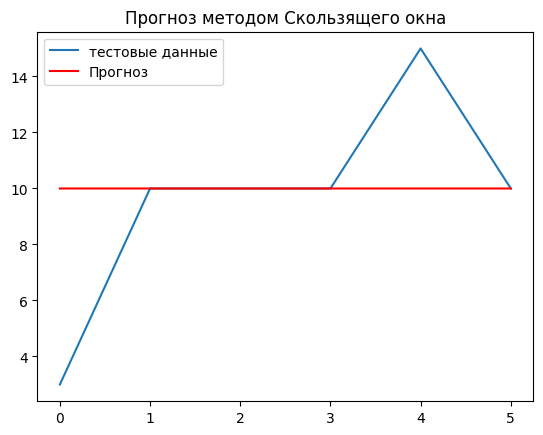

In [ ]:
x_ax = range(len(z2))
plt.plot( x_ax,z2, label="тестовые данные")
plt.plot( x_ax, zpred1, color = 'red', label="Прогноз")
plt.title("Прогноз методом Скользящего окна")
plt.legend()
plt.show()

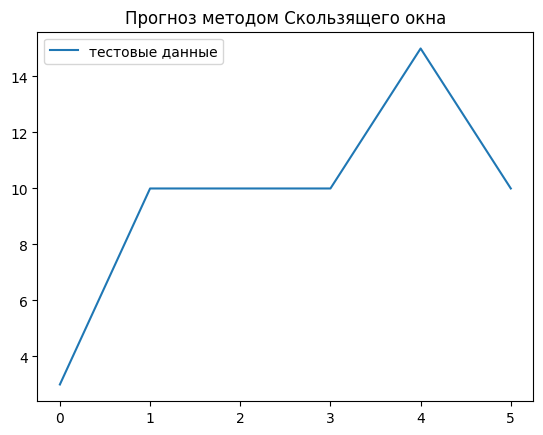

In [ ]:
x_ax = range(len(z2))
plt.plot( x_ax,z2, label="тестовые данные")
plt.title("Прогноз методом Скользящего окна")
plt.legend()
plt.show()

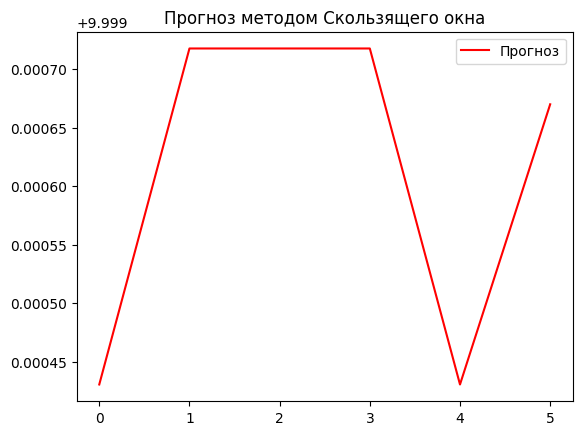

In [ ]:
x_ax = range(len(z2))

plt.plot( x_ax, zpred1, color = 'red', label="Прогноз")
plt.title("Прогноз методом Скользящего окна")
plt.legend()
plt.show()
